### Reading the market data of HCLTECH stock and preparing a training dataset and validation dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C:\Users\HP\Downloads\NIFTY50\HCLTECH.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [3]:
df.set_index('Date',inplace=True)

#### Plotting the target variable VWAP over time

<AxesSubplot:xlabel='Date'>

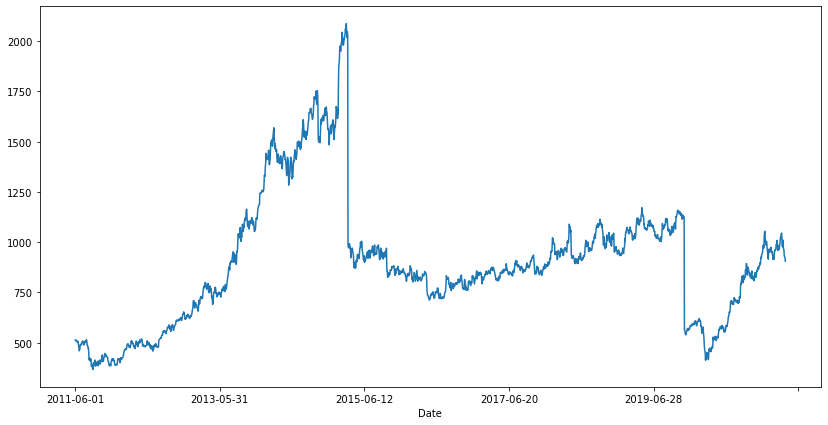

In [53]:
df['VWAP'].plot(figsize=(14,7))

### so u can observe here some kind of Seasonality

### Data Pre-Processing

In [5]:
df.shape

(5300, 14)

In [6]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2844
Deliverable Volume     503
%Deliverble            503
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [9]:
df.shape

(2456, 14)

In [10]:
data=df.copy()

In [11]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [12]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [13]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [14]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [15]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [16]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,HCLTECH,EQ,514.80,511.40,516.00,509.00,514.75,514.40,512.70,287699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,HCLTECH,EQ,514.40,509.00,515.25,508.70,514.75,513.70,512.86,307689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,HCLTECH,EQ,513.70,512.05,517.50,508.90,513.70,512.35,513.58,379167,...,1.145644,NaN,0.152753,NaN,48088.632766,NaN,2.483403e+12,NaN,2315.298973,NaN
2011-06-06,HCLTECH,EQ,512.35,508.05,514.00,505.05,509.10,509.50,508.07,285294,...,1.773650,NaN,2.167372,NaN,49028.530194,NaN,2.584369e+12,NaN,2079.889661,NaN
2011-06-07,HCLTECH,EQ,509.50,504.05,514.95,504.05,511.95,511.80,510.77,403694,...,1.809926,NaN,2.560762,NaN,62493.031422,NaN,3.256026e+12,NaN,2139.991199,NaN


In [17]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [18]:
data.shape

(2456, 34)

In [19]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [20]:
data.dropna(inplace=True)

In [21]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [22]:
ind_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [23]:
training_data=data[0:1800]
test_data=data[1800:]

In [24]:
training_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,HCLTECH,EQ,510.95,503.70,508.95,497.70,508.00,507.70,503.70,453600,...,3.031089,2.758234,5.451223,4.179257,156755.808862,96573.509497,7.889612e+12,4.872383e+12,3056.889269,2296.811226
2011-06-10,HCLTECH,EQ,507.70,504.00,508.55,501.10,502.25,502.85,503.71,180156,...,2.289287,3.324011,5.549550,4.296870,163810.387477,111039.891708,8.214331e+12,5.642149e+12,3221.773632,2272.888900
2011-06-13,HCLTECH,EQ,502.85,501.00,506.00,496.50,500.95,500.35,501.95,372637,...,1.600260,4.090378,2.386071,4.911963,140460.886528,113498.077030,7.066326e+12,5.748965e+12,2862.826575,2595.170707
2011-06-14,HCLTECH,EQ,500.35,504.00,509.30,502.10,509.00,507.60,506.52,302309,...,1.729884,3.282747,2.986637,4.199405,97396.370872,110417.912572,4.884465e+12,5.566683e+12,2577.047988,2381.563422
2011-06-15,HCLTECH,EQ,507.60,505.00,509.40,498.10,500.00,499.20,503.66,418302,...,1.934770,2.939509,2.884441,4.221022,58431.863251,117039.403639,2.893123e+12,5.892424e+12,3312.451408,2742.084478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,HCLTECH,EQ,1049.15,1051.15,1079.00,1051.00,1076.00,1076.35,1070.17,2792371,...,12.489996,15.583481,16.649424,13.592150,526576.262954,741947.598783,5.455941e+13,7.881549e+13,23819.540011,30954.380371
2018-09-05,HCLTECH,EQ,1076.35,1075.80,1087.00,1068.00,1077.00,1078.95,1078.81,2850556,...,13.316656,19.744333,12.093524,19.020074,344356.448601,642420.810822,3.999298e+13,6.940400e+13,15878.782164,29309.579144
2018-09-06,HCLTECH,EQ,1078.95,1075.00,1089.80,1065.40,1088.80,1088.80,1082.22,2995905,...,5.604760,22.354389,9.157147,21.788652,104831.543585,443453.659050,1.290506e+13,4.997563e+13,5679.811470,26030.079427


In [26]:
from pmdarima import auto_arima

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
model=auto_arima(y=training_data['VWAP'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17197.346, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17201.509, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17193.342, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17193.188, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17199.739, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17195.183, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17195.176, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17196.816, Time=1.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17191.388, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17193.382, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=17193.377, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17191.540, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=17195.031, Time=0.39 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 4.454 seconds


In [33]:
model.fit(training_data['VWAP'],X=training_data[ind_features])

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [46]:
forecast=model.predict(n_periods=len(test_data), X=test_data[ind_features])
forecast=forecast.to_numpy()

In [47]:
test_data['Forecast_ARIMA']=forecast

<AxesSubplot:xlabel='Date'>

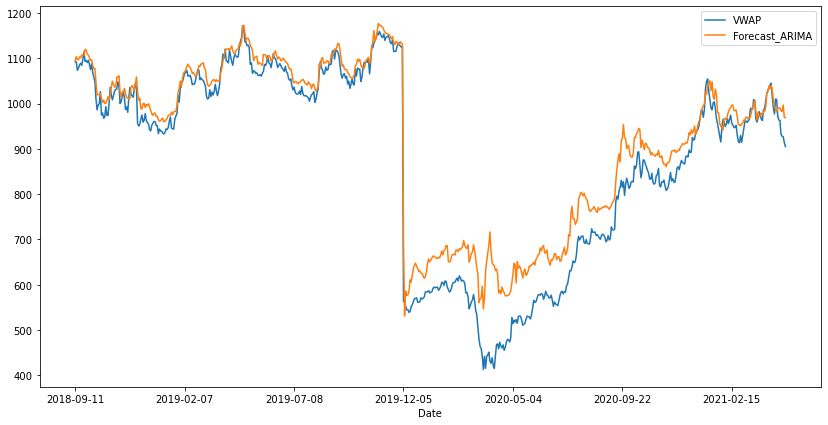

In [48]:
test_data[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

#### The Auto ARIMA model seems to do a fairly good job in predicting the stock price

#### Checking Accuracy of our model

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [50]:
np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

61.37175626533543

In [51]:
mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA'])

45.53204927799857

In [56]:
VWAP=test_data['VWAP'].to_numpy()

In [57]:
np.mean(VWAP)

878.0110153846152

#### ACCURACY OF MODEL IS AROUND 95%